<a href="https://colab.research.google.com/github/tomiambro/covid_transfer_learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install --upgrade git+https://github.com/fastai/fastai.git &> 2
!pip install pip install nbdev &> 2

In [9]:
from fastai.vision.all import *
from torchvision import transforms as T

In [13]:
dataset_path = 'gdrive/MyDrive/machine_learning/datasets/covid_dataset'  #change dir to your project folder
folder_path = 'gdrive/MyDrive/machine_learning/covid/'

In [15]:
from google.colab import drive

drive._mount('/content/gdrive')

Mounted at /content/gdrive


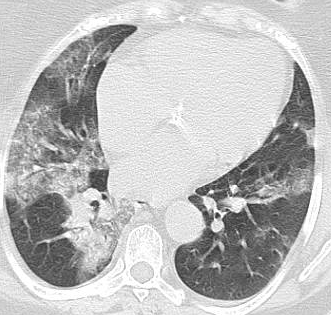

In [4]:
im = Image.open(f"{dataset_path}/COVID/Covid (1000).png")
im.to_thumb(350,350)

Create array with Path objects to imgs

In [5]:
path = Path(f"{dataset_path}")
fns = get_image_files(path)
fns

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [6]:
imgs = get_image_files(f"{dataset_path}")
imgs

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [7]:
covid = DataBlock(
    blocks=(ImageBlock, CategoryBlock(['non-COVID', 'COVID'], sort=False)), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(350,350))

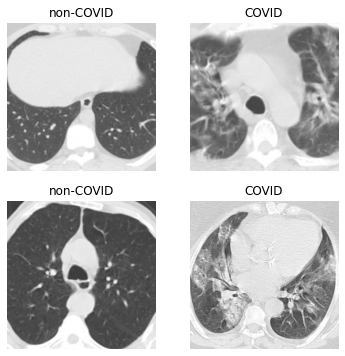

In [8]:
dls = covid.dataloaders(path)
dls.valid.show_batch(max_n=4)

In [9]:
dls.train.vocab

['non-COVID', 'COVID']

In [10]:
learn = cnn_learner(dls, resnet18, metrics=F1Score())

SuggestedLRs(valley=0.0011220184387639165)

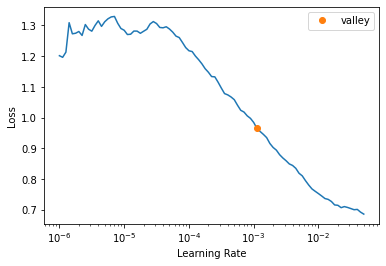

In [11]:
learn.lr_find(start_lr=1e-6, end_lr=0.1)

In [12]:
lr = 1e-3
learn.fine_tune(3, lr)

epoch,train_loss,valid_loss,f1_score,time
0,0.818884,0.601886,0.698492,00:36


epoch,train_loss,valid_loss,f1_score,time
0,0.376158,0.331287,0.864097,00:39
1,0.286323,0.233231,0.923729,00:38
2,0.210694,0.200736,0.925373,00:37


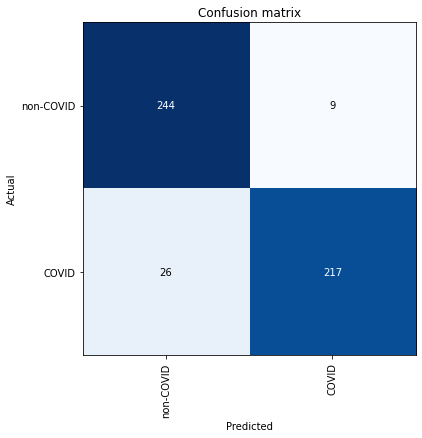

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

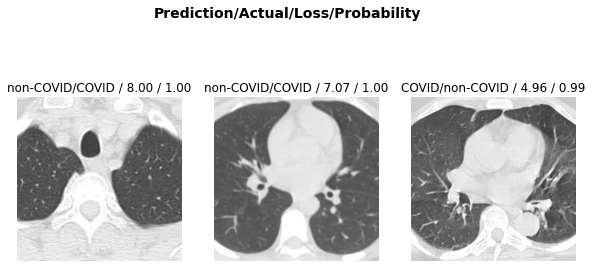

In [14]:
interp.plot_top_losses(3, figsize=(10,5))

In [15]:
learn.predict(f"{dataset_path}/COVID/Covid (1000).png")

('COVID', TensorBase(1), TensorBase([1.5387e-05, 9.9998e-01]))

In [16]:
learn = cnn_learner(dls, resnet34, metrics=F1Score(), path=folder_path)

In [17]:
lr = 1e-3
learn.fine_tune(5, lr)

epoch,train_loss,valid_loss,f1_score,time
0,0.794425,0.415825,0.824034,00:43


epoch,train_loss,valid_loss,f1_score,time
0,0.451189,0.320515,0.877127,00:56
1,0.305970,0.142110,0.954167,00:56
2,0.188932,0.116398,0.966805,00:56
3,0.116775,0.110263,0.964803,00:56
4,0.076282,0.105816,0.962656,00:56


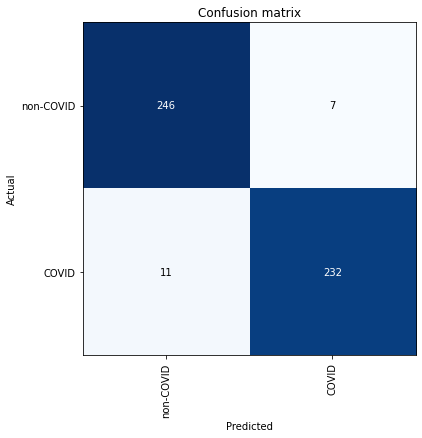

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

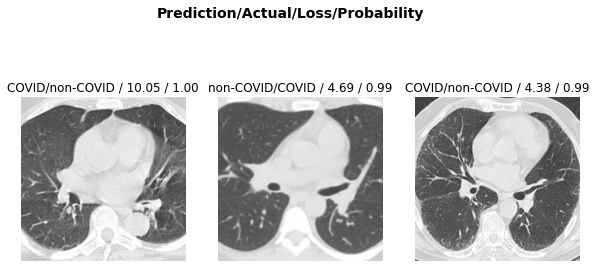

In [19]:
interp.plot_top_losses(3, figsize=(10,5))

## Inference

Load the model from URL

In [101]:
learn.export()
!ls {folder_path}

export.pkl


In [10]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU" -O export.pkl && rm -rf /tmp/cookies.txt

--2021-12-10 20:50:21--  https://docs.google.com/uc?export=download&confirm=ft3I&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU
Resolving docs.google.com (docs.google.com)... 142.250.125.100, 142.250.125.113, 142.250.125.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.125.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-34-docs.googleusercontent.com/docs/securesc/cmvmoj8v1ji717gtd386s0vej3vdj3uo/nvme8mfglpfnfhcu90uvt7shu86ashon/1639169400000/05955112456020216338/01998978882358731827Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download [following]
--2021-12-10 20:50:21--  https://doc-0o-34-docs.googleusercontent.com/docs/securesc/cmvmoj8v1ji717gtd386s0vej3vdj3uo/nvme8mfglpfnfhcu90uvt7shu86ashon/1639169400000/05955112456020216338/01998978882358731827Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download
Resolving doc-0o-34-docs.googleusercontent.com (doc-0o-34-docs.googleusercontent.com)... 142.251.6.132, 2607:f8b0:4001:c5a::84
Connect

In [11]:
!ls -la

total 85484
drwxr-xr-x 1 root root     4096 Dec 10 20:47 .
drwxr-xr-x 1 root root     4096 Dec 10 20:38 ..
-rw-r--r-- 1 root root     6145 Dec 10 20:48 2
drwxr-xr-x 4 root root     4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 87510221 Dec 10 20:50 export.pkl
drwxr-xr-x 1 root root     4096 Dec  3 14:33 sample_data


In [16]:
learn_l = load_learner('export.pkl')
c, _, probas = learn_l.predict(f"{dataset_path}/COVID/Covid (1000).png")

In [17]:
probas *= 100

In [19]:
print(f'There\'s a {round(probas[0].item(), 3)}% probability of non-covid and a {round(probas[1].item(), 3)}% probability of covid')

There's a 0.001% probability of non-covid and a 99.999% probability of covid


In [ ]:
covid = covid.new(
    item_tfms=Resize(350),
    batch_tfms=[DeterministicFlip, RandomErasing(p=.5, sh=.1)])
dls = covid.dataloaders(path)

In [ ]:
train_features, train_labels = next(iter(dls.train))
trans = T.ToPILImage()
trans(train_features[0])